In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

# Select the attributes: Annual Income, and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
# Cell 3: Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create a new DataFrame for the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)
scaled_df


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


coordinates of centroids are [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


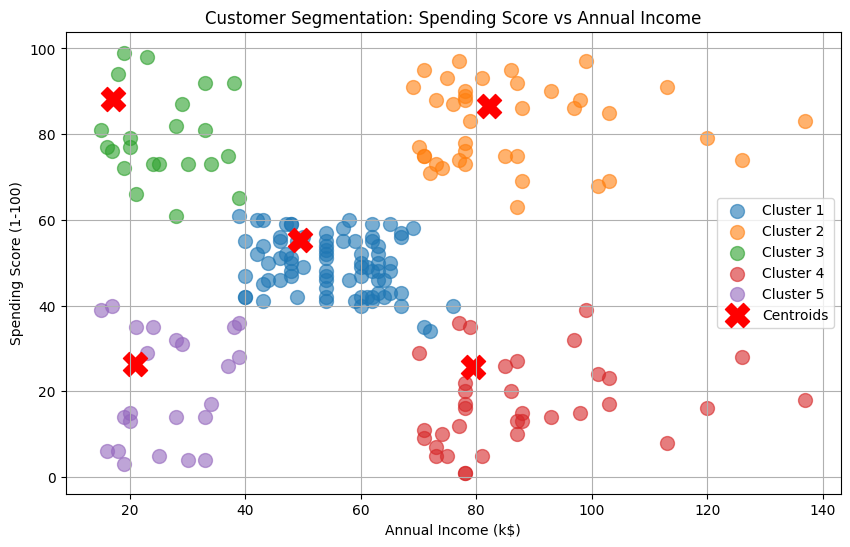

<Figure size 640x480 with 0 Axes>

In [7]:
k=5

kmeans = KMeans(n_clusters=k, random_state=42)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters using Spending Score and Annual Income
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster in range(k):
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'], 
                df[df['Cluster'] == cluster]['Spending Score (1-100)'], 
                s=100, label=f'Cluster {cluster + 1}', alpha=0.6)

# Plot the centroids
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)  # Inverse scale for plotting

print('coordinates of centroids are', centroids)

plt.scatter(centroids[:, 1], centroids[:, 0], 
            s=300, c='red', label='Centroids', marker='X')

plt.title('Customer Segmentation: Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.savefig('results.png')
plt.show()

In [8]:

def get_cluster_number(input_data):
    # Scale the input data
    input_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    
    # Predict the cluster
    cluster_number = kmeans.predict(input_scaled)
    return cluster_number[0]+1

get_cluster_number([23, 60])



C:\Users\ojas2\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


3